In [17]:
import os
import urllib

from osgeo import gdal
import rasterio as rio
import rasterio.plot
from rasterio.windows import Window
from math import floor, ceil
from pyproj import Proj
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs
import dask
import glob
import re, datetime


months=range(1,12)

def prism2vals(file,lat1,lat2,lon1,lon2):
    with rasterio.open(file) as src:
        row, col  = src.index(lon1, lat1) # spatial --> image coordinates
        row2,col2 = src.index(lon2, lat2) # spatial --> image coordinates
        windowTmp = Window.from_slices(rows=(row2,row),cols=(col, col2))
        arr = src.read(1, window=windowTmp)
        lat = np.arange(lat2,lat1,src.transform[4])
        lon = np.arange(lon1,lon2,src.transform[0])
        arr[arr==-9999]=np.nan
        return arr,lat,lon

prismBaseDir ='/glade/u/home/currierw/work/prism/4km/ppt/'
fList=sorted(glob.glob(prismBaseDir+'*.bil'))

for i in range(1,len(fList)):
    
    filePpt      = fList[i]
    match = re.search('\d{4}\d{2}', filePpt)
    date = datetime.datetime.strptime(match.group(), '%Y%m').date()
    t=pd.to_datetime(date)
    
    lat1,lat2=(30,45)
    lon1,lon2=(-117,-103)
    
    vals,lat,lon=prism2vals(filePpt,lat1,lat2,lon1,lon2)
    ds_P_tmp = xr.Dataset({"precipitation":(("lat","lon"),vals)},
                  coords={"lat":lat,"lon":lon})

    ds_PRISM_tmp=ds_P_tmp
    ds_PRISM_tmp=ds_PRISM_tmp.assign_coords({'time': t})
    if i == 1:
        ds_PRISM=ds_PRISM_tmp
    else:
        ds_PRISM=xr.combine_nested([ds_PRISM,ds_PRISM_tmp],concat_dim=['time'])


# Import state vector file using geopandas
# states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
# states_gdf = gpd.read_file(states_url)

# df=gpd.read_file('/glade/u/home/currierw/work/shape/crb/b9522000.shp')
# df

In [21]:
ds_PRISM.to_netcdf('prismPpt.nc')

# Temperature data

In [2]:
import os
import urllib

from osgeo import gdal
import rasterio as rio
import rasterio.plot
from rasterio.windows import Window
from math import floor, ceil
from pyproj import Proj
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs
import dask
import glob
import re, datetime


months=range(1,12)

def prism2vals(file,lat1,lat2,lon1,lon2):
    with rasterio.open(file) as src:
        row, col  = src.index(lon1, lat1) # spatial --> image coordinates
        row2,col2 = src.index(lon2, lat2) # spatial --> image coordinates
        windowTmp = Window.from_slices(rows=(row2,row),cols=(col, col2))
        arr = src.read(1, window=windowTmp)
        lat = np.arange(lat2,lat1,src.transform[4])
        lon = np.arange(lon1,lon2,src.transform[0])
        arr[arr==-9999]=np.nan
        return arr,lat,lon

prismBaseDir ='/glade/u/home/currierw/work/prism/4km/tmean/'
fList=sorted(glob.glob(prismBaseDir+'*.bil'))

for i in range(1,len(fList)):
    
    filePpt      = fList[i]
    match = re.search('\d{4}\d{2}', filePpt)
    date = datetime.datetime.strptime(match.group(), '%Y%m').date()
    t=pd.to_datetime(date)
    
    lat1,lat2=(30,45)
    lon1,lon2=(-117,-103)
    
    vals,lat,lon=prism2vals(filePpt,lat1,lat2,lon1,lon2)
    ds_P_tmp = xr.Dataset({"tmean":(("lat","lon"),vals)},
                  coords={"lat":lat,"lon":lon})

    ds_PRISM_tmp=ds_P_tmp
    ds_PRISM_tmp=ds_PRISM_tmp.assign_coords({'time': t})
    if i == 1:
        ds_PRISM=ds_PRISM_tmp
    else:
        ds_PRISM=xr.combine_nested([ds_PRISM,ds_PRISM_tmp],concat_dim=['time'])


# Import state vector file using geopandas
# states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
# states_gdf = gpd.read_file(states_url)

# df=gpd.read_file('/glade/u/home/currierw/work/shape/crb/b9522000.shp')
# df

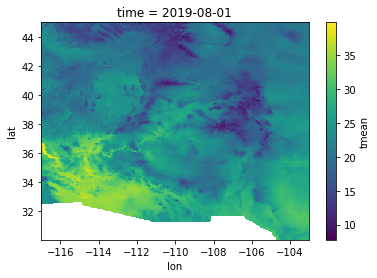

In [6]:
ds_PRISM['tmean'][-1,:,:].plot()

In [7]:
ds_PRISM.to_netcdf('prismTmean.nc')